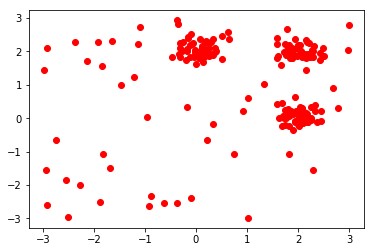

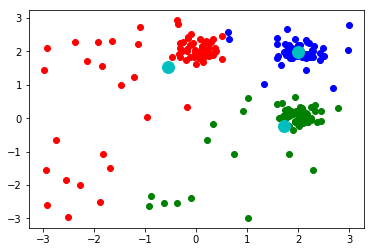

In [1]:
#Task3.1
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

df = pd.read_csv('./data-clustering-1.csv', header=-1)
X_data = df.values[0:1]
Y_data = df.values[1:]
plt.plot(X_data, Y_data, 'ro')
plt.show()

data = df.values
X_data = X_data.reshape(200,1)
Y_data = Y_data.reshape(200,1)
data = np.concatenate((X_data, Y_data), axis=1)

from scipy.cluster.vq import kmeans,vq
centroids,_ = kmeans(data,3)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plt.plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'or', data[idx==2,0],data[idx==2,1],'og')
plt.plot(centroids[:,0],centroids[:,1],'oc',markersize=12)
plt.show()

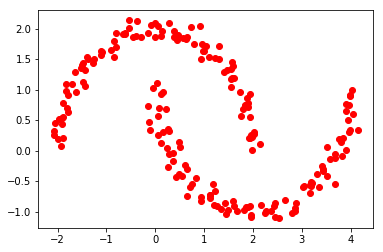

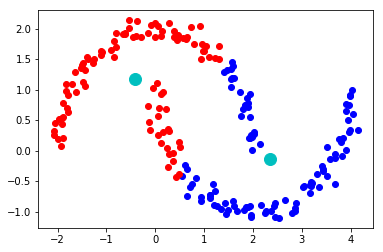

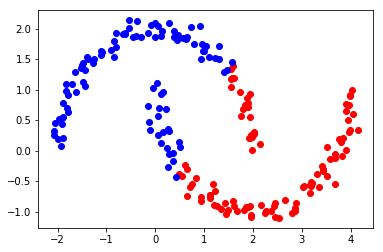

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import numpy.linalg as la
import sklearn.metrics as mat

df = pd.read_csv('./data-clustering-2.csv', header=-1)
X_data = df.values[0:1]
Y_data = df.values[1:]


plt.plot(X_data, Y_data, 'ro')
plt.show()

data = df.values
X_data = X_data.reshape(200,1)
Y_data = Y_data.reshape(200,1)
data = np.concatenate((X_data, Y_data), axis=1)

from scipy.cluster.vq import kmeans,vq
centroids,_ = kmeans(data,2)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plt.plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'or')
plt.plot(centroids[:,0],centroids[:,1],'oc',markersize=12)
plt.show()

b =1

S = np.exp(-b * mat.pairwise_distances(data, metric='euclidean'))
D = np.diag(np.sum(S, axis=0))
L = D - S
E,V = la.eig(L) 
E_sort = np.sort(E)
value_second = E_sort[1]#second smallest
indexsmallest2 = np.where( E == value_second )
V2 = V[:,indexsmallest2]
V2 = V2.reshape((200,))
labels = (V2 > 0) * 1

i, j = (labels == 0).nonzero(), (labels == 1).nonzero()
plt.plot(X_data[i], Y_data[i], 'ro')
plt.plot(X_data[j], Y_data[j], 'bo')
plt.show()



(500, 150) (150, 1)
(150,)
(150, 500)
explained variance ratio (first two components): [ 0.21608181  0.19081235]


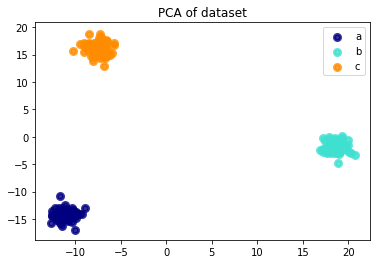

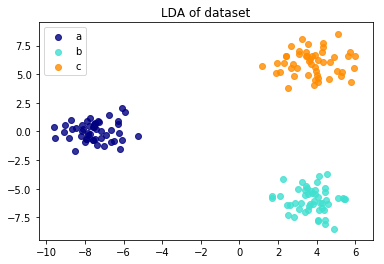

In [16]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import numpy.linalg as la
import sklearn.metrics as mat

df_X = pd.read_csv('./data-dimred-X.csv', header=-1)
df_Y = pd.read_csv('./data-dimred-y.csv', header=-1)

print df_X.shape, df_Y.shape
#150 point and 500 dimensions 
# 150 Labels

X = df_X.T


y = df_Y.values.reshape((150,))

print y.shape
print X.shape

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

#print X_r.shape

print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 3

target_names = ['a', 'b', 'c']

for color, i, target_name in zip(colors, [1, 2, 3], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of dataset')

plt.figure()
for color, i, target_name in zip(colors, [1, 2, 3], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of dataset')

plt.show()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


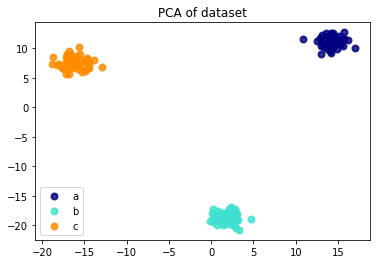

In [5]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import numpy.linalg as la
import sklearn.metrics as mat

df_X = pd.read_csv('./data-dimred-X.csv', header=-1)
df_Y = pd.read_csv('./data-dimred-y.csv', header=-1)

#print df_X.shape, df_Y.shape
#150 point and 500 dimensions 
# 150 Labels

X = df_X.T
y = df_Y.values.reshape((150,))

#print y.shape
#print X.shape

#500 feature , 150 vectors
mu = np.mean(X.values, axis=0)

#print mu.shape
#print X.T.shape
#print mu.reshape((500,1)).shape
X_new = X.values.T - mu.reshape((500,1))

#print "X_new", X_new.shape

cov = np.cov(X_new)

#print cov.shape

EW, EV = la.eig(cov)

#print EW.shape
EW_sort = np.sort(EW)

#print EV.shape

v1 = EW_sort[498]
v2 = EW_sort[499]


i1 = np.where( EW == v1 ) #second large

i2 = np.where( EW == v2 ) #large

#print i1, i2

u1 = EV[:,i1]
u2 = EV[:,i2]

#print u1.shape


u1 = u1.reshape((500,))
u2 = u2.reshape((500,))

U = np.array([u1, u2])

#print U.shape

X_Proj = np.matmul(U, X_new)

#print X_Proj.shape

colors = ['navy', 'turquoise', 'darkorange']
for color, i, target_name in zip(colors, [1, 2, 3], ['a','b','c']):
    plt.scatter(X_Proj.T[y == i, 0], X_Proj.T[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)

    plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.title('PCA of dataset')
#plt.plot(X_Proj[0], X_Proj[1], 'ro')

plt.show()

(200, 2) (200, 1)


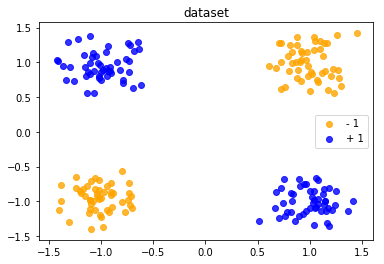

In [39]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import numpy.linalg as la
import sklearn.metrics as mat

df_X = pd.read_csv('./xor-X.csv', header=-1)
df_Y = pd.read_csv('./xor-y.csv', header=-1)

X = df_X.values.T
y = df_Y.values.reshape((200,))

print df_X.values.T.shape, df_Y.values.shape

colors = ['orange', 'blue']
for color, i, target_name in zip(colors, [-1, +1], ['- 1','+ 1']):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=.8,
                label=target_name)

    plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.title('dataset')

plt.show()


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:53: RankWarning: The fit may be poorly conditioned


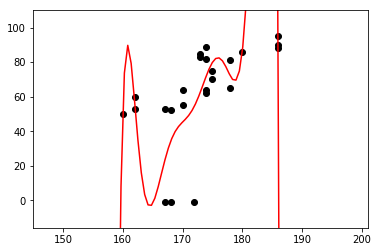

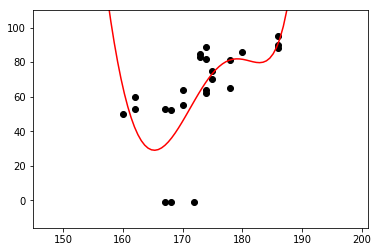

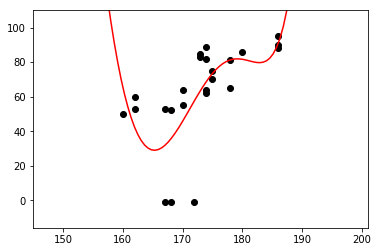

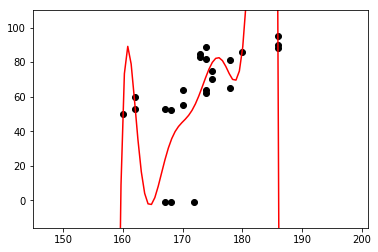

In [11]:
import numpy as np
import numpy.linalg as la
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

dt = np.dtype([('w', np.float), ('h', np.float), ('g', np.str_, 1)])
data = np.loadtxt('whData.dat', dtype=dt, comments='#', delimiter=None)

# read height, weight and gender information into 1D arrays
ws = np.array([d[0] for d in data])
hs = np.array([d[1] for d in data])
gs = np.array([d[2] for d in data]) 


##########################################################################
# 2nd alternative for reading multi-typed data from a text file
##########################################################################
# read data as 2D array of data type 'object'
data = np.loadtxt('whData.dat',dtype=np.object,comments='#',delimiter=None)

# read height and weight data into 2D array (i.e. into a matrix)
X = data[:,0:2].astype(np.float)

# read gender data into 1D array (i.e. into a vector)
y = data[:,2]

# let's transpose the data matrix 
X = X.T
# now, plot weight vs. height using the function defined above
#plotData2D(X, 'plotWH.pdf')

# next, let's plot height vs. weight 
# first, copy information rows of X into 1D arrays
hgt = np.copy(X[1,:])
wgt = np.copy(X[0,:])
xmin = hgt.min()-15
xmax = hgt.max()+15
ymin = wgt.min()-15
ymax = wgt.max()+15

def plot_data_and_fit(h, w, x, y):
    plt.plot(h, w, 'ko', x, y, 'r-')
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.show()

def trsf(x):
    return x / 100.
n = 10
x = np.linspace(xmin, xmax, 100)
# method 1:
# regression using ployfit
c = poly.polyfit(hgt, wgt, n)
y = poly.polyval(x, c)
plot_data_and_fit(hgt, wgt, x, y)
# method 2:
# regression using the Vandermonde matrix and pinv
X = poly.polyvander(hgt, n)
c = np.dot(la.pinv(X), wgt)
y = np.dot(poly.polyvander(x,n), c)
plot_data_and_fit(hgt, wgt, x, y)
# method 3:
# regression using the Vandermonde matrix and lstsq
X = poly.polyvander(hgt, n)
c = la.lstsq(X, wgt)[0]
y = np.dot(poly.polyvander(x,n), c)
plot_data_and_fit(hgt, wgt, x, y)
# method 4:
# regression on transformed data using the Vandermonde

# matrix and either pinv or lstsq
X = poly.polyvander(trsf(hgt), n)
c = np.dot(la.pinv(X), wgt)
y = np.dot(poly.polyvander(trsf(x),n), c)
plot_data_and_fit(hgt, wgt, x, y)